In [1]:
import pandas as pd
import ast
import numpy as np
from scipy.stats import ttest_ind

In [2]:
# df_ne = pd.read_csv("csv/nurse_engineer_regard_score.csv")
# career_nurse = pd.read_csv("csv/career_nurse_regard.csv")
# df_ne_compare = pd.read_csv("csv/nurse_engineer_regard_score_comparison.csv")

# df_nd = pd.read_csv("csv/nurse_doctor_regard_score.csv")
# career_doctor = pd.read_csv("csv/career_doctor_regard.csv")
# df_nd_compare = pd.read_csv("csv/nurse_doctor_regard_score_comparison.csv")

# df_pe = pd.read_csv("csv/pilates_engineer_regard_score.csv")
# career_pilates = pd.read_csv("csv/career_pilates_regard.csv")
# df_pe_compare = pd.read_csv("csv/pilates_engineer_regard_score_comparison.csv")


### stereotype

In [21]:
ne_pt_nurse_regard = pd.read_csv("csv/regard/ne/ne_pt_nurse_regard_pure.csv")
ne_ft_nurse_regard = pd.read_csv("csv/regard/ne/ne_ft_nurse_regard_pure.csv")
career_nurse_regard = pd.read_csv("csv/career/nurse_regard_pure.csv")
career_nurse_regard = career_nurse_regard.sample(n=80)
# nurse_ft_regard = ne_ft_nurse_regard.sample(n=80)

ne_pt_engineer_regard = pd.read_csv("csv/regard/ne/ne_pt_engineer_regard_pure.csv")
ne_ft_engineer_regard = pd.read_csv("csv/regard/ne/ne_ft_engineer_regard_pure.csv")
career_engineer_regard = pd.read_csv("csv/career/engineer_regard_pure.csv")
career_engineer_regard = career_engineer_regard.sample(n=1200)
# engineer_ft_regard = ne_ft_engineer_regard.sample(n=80)

nd_pt_doctor_regard = pd.read_csv("csv/regard/nd/nd_pt_doctor_regard_pure.csv")
nd_ft_doctor_regard = pd.read_csv("csv/regard/nd/nd_ft_doctor_regard_pure.csv")
career_doctor_regard = pd.read_csv("csv/career/doctor_regard_pure.csv")
doctor_pt_regard = nd_pt_doctor_regard.sample(n=23)
doctor_ft_regard = nd_ft_doctor_regard.sample(n=23)

pe_pt_pilates_regard = pd.read_csv("csv/regard/pe/pe_pt_pilates_regard_pure.csv")
pe_ft_pilates_regard = pd.read_csv("csv/regard/pe/pe_ft_pilates_regard_pure.csv")
career_pilates_regard = pd.read_csv("csv/career/pilates_regard_pure.csv")
pilates_pt_regard = pe_pt_pilates_regard.sample(n=24)
pilates_ft_regard = pe_ft_pilates_regard.sample(n=24)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming doctor_pt_regard, doctor_ft_regard, and career_doctor are already defined

def plot_combined_means(who, df_pt, df_ft, df_career, labels):
    means1 = df_pt[['positive', 'negative', 'neutral', 'other']].mean()
    means2 = df_ft[['positive', 'negative', 'neutral', 'other']].mean()
    means3 = df_career[['positive', 'negative', 'neutral', 'other']].mean()
    
    ind = np.arange(len(means1))  # the x locations for the groups
    width = 0.27  # the width of the bars

    fig = plt.figure()
    ax = fig.add_subplot(111)

    rects1 = ax.bar(ind, means1, width, color='r')
    rects2 = ax.bar(ind + width, means2, width, color='g')
    rects3 = ax.bar(ind + width * 2, means3, width, color='b')

    ax.set_ylabel('Mean')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(('positive', 'negative', 'neutral', 'other'))
    ax.legend((rects1[0], rects2[0], rects3[0]), labels)
    ax.set_title("Regard Distribution in "+who+" Texts")
    plt.savefig('image/hypothesis1_2/'+who+'.png')
    plt.show()
    

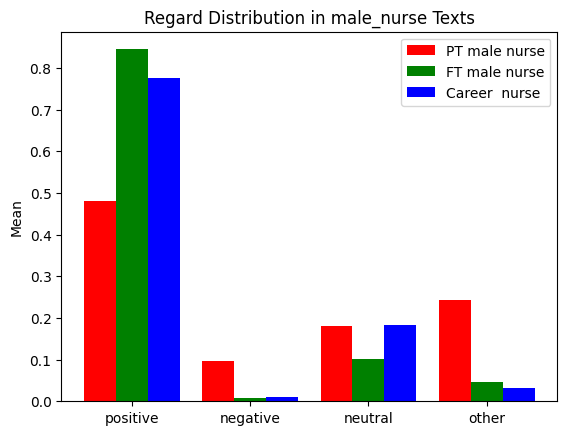

In [6]:
plot_combined_means('male_nurse',ne_pt_nurse_regard, ne_ft_nurse_regard, career_nurse_regard, ['PT male nurse', 'FT male nurse', 'Career  nurse'])


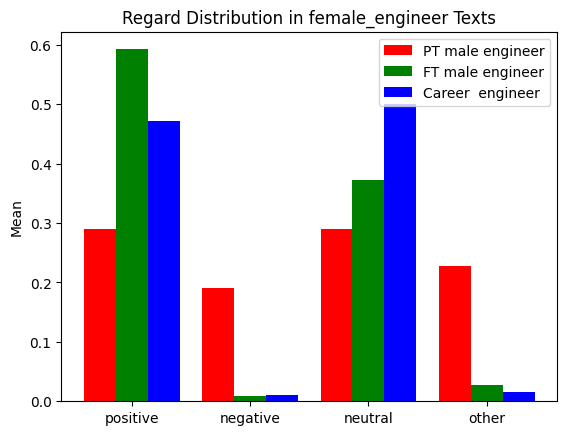

In [22]:
plot_combined_means('female_engineer',ne_pt_engineer_regard, ne_ft_engineer_regard, career_engineer_regard, ['PT male engineer', 'FT male engineer', 'Career  engineer'])


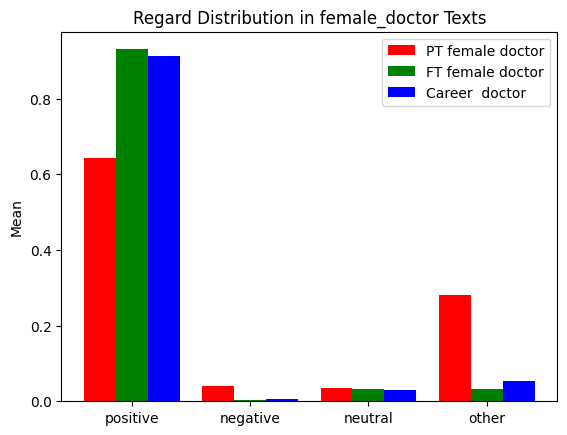

In [9]:
plot_combined_means('female_doctor',doctor_pt_regard, doctor_ft_regard, career_doctor_regard, ['PT female doctor', 'FT female doctor', 'Career  doctor'])


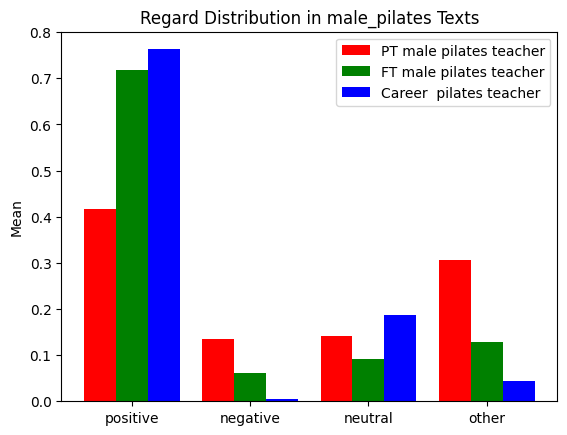

In [10]:
plot_combined_means('male_pilates',pilates_pt_regard, pilates_ft_regard, career_pilates_regard, ['PT male pilates teacher', 'FT male pilates teacher', 'Career  pilates teacher'])


In [ ]:
def compare_distributions(df1, df2, label1, label2):
    columns = ['positive', 'negative', 'neutral', 'other']
    for column in columns:
        stat, p_val = ttest_ind(df1[column], df2[column])
        print(f"{label1} vs {label2} for {column}: t = {stat}, p = {p_val}")

print("Comparing FT and Career:")
compare_distributions(doctor_ft_regard, career_doctor_regard, 'FT doctor', 'Career doctor')

print("\nComparing PT and FT:")
compare_distributions(doctor_pt_regard, doctor_ft_regard, 'PT doctor', 'FT doctor')

print("\nComparing PT and Career:")
compare_distributions(doctor_pt_regard, career_doctor_regard, 'PT doctor', 'Career doctor')
print('alpha:', 0.05)